## Household Power Consumption Prediction using RNN LSTM

Download Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip

Details: https://archive.ics.uci.edu/ml/datasets/indivual+household+electric+power+consumption

Power outage accidents will cause huge economic loss  to the social economy. Therefore, it is very important to predict power consumption



Given the rise of smart electricity meters and the wide adoption of electricity generation technology like solar panels, there is a wealth of electricity usage data available

This data represents a multivariate time series of power-related variables that in turn could be used to model and even forecast future electricity consumption

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minitue


*It's a multivariate series comprised of seven variables*
* global_activate_power: The total activate power consumed by the household(kilowatts)
* global_reactive_power: The total reactive power consumed by the household(kVAR)

* voltage: Average voltage(volts)
* global_intensity: Average current intensity(amps)
* sub_metering_1: Active energy for kitchen(watt-hours of activate energy)
* sub_metering_2: Activate energy for laundry(watt-hours of active energy)
* sub_metering_3: Activate energy for climate control systems(watt-hours of active energy)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import LSTM, Dense

In [3]:
from sklearn.metrics import mean_squared_error
# Normalize
from sklearn.preprocessing import MinMaxScaler

In [12]:
data = pd.read_csv("./household_power_consumption/household_power_consumption.txt", sep=";", parse_dates = True, low_memory = False)

In [13]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [15]:
# set dates as index

# concatenate date and time

data['date_time'] = data['Date'].str.cat(data['Time'], sep = " ")

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [16]:
# drop Date and time column
data_1 = data.copy()
data_1.drop(['Date', 'Time'], inplace = True, axis=1)

data_1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [17]:
# set data_time as index

data_1.set_index(['date_time'], inplace=True)
data_1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [19]:
data_1.replace('?', nan, inplace=True)

In [20]:
data.info

<bound method DataFrame.info of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                 0.000   
2075255  26/11/2010  20:59:00               0.944                 0.000   
2075256  26/11/2010  21:00:00               0.938                 0.000   
2075257  26/11/2010  21:01:00               0.934                 0.000   
2075258  26/11/2010  21:02:00               0.932                 0.000   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \


In [21]:
# convert the values into float

data_1 = data_1.astype('float')

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [25]:
# cuantos valores son nan

np.isnan(data_1).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [26]:
def fill_missing(data):
    one_day = 24*60
    for row in range(data_1.shape[0]):
        for col in range(data_1.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data [row - one_day, col]
            

In [28]:
fill_missing(data_1.values)

In [29]:
# cheack again
np.isnan(data_1).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [30]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [32]:
data_1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [34]:
data_1.shape

(2075259, 7)

In [36]:
# we can see that date_time is not parse into a date/time format
data_1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Prepare power consumption for each day

In [37]:
# we need to parse the date_time

data_1.to_csv('cleaned_data.csv')

In [38]:
# 2 milllion examples, this could take some minutes
dataset = pd.read_csv('cleaned_data.csv', parse_dates = True, index_col = 'date_time', low_memory = False)

In [39]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [40]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## Let's do EDA

In [64]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [41]:
# with this the data is available for each day 
data = dataset.resample('D').sum()


In [42]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


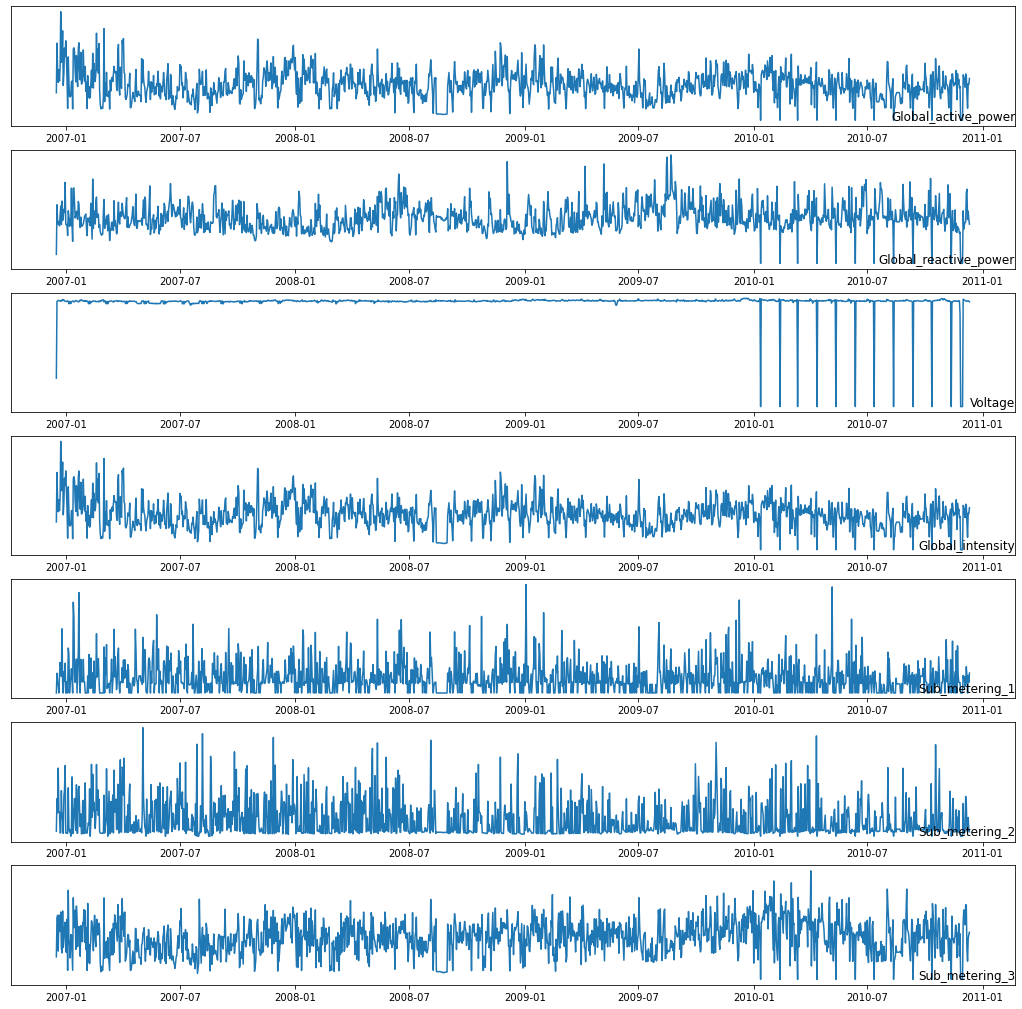

In [46]:
# Plot the data for day


fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1 )
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()
    

### Exploring Active power consumption for each year

In [47]:
years  = ['2007', '2008', '2009', '2010']

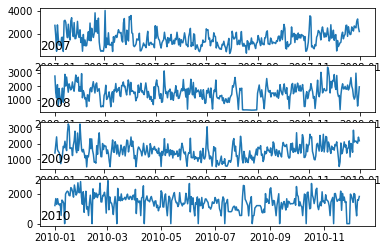

In [49]:
# plotting active power for each month a particular year 
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data["Global_active_power"])
    plt.title(str(year), y=0, loc = 'left')
plt.show()
fig.tight_layout()

In [ ]:
## Notemos lo siguiente, la potencia es mayor al inicio y al final del year,(para esta data de usa) que en el medio del year, esto puede ser porque los sistemas de calentamiento son mas usados en el invierno

In [90]:
dataset["2007"]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2007-12-31 23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
2007-12-31 23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,18.0
2007-12-31 23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,18.0


In [50]:
# Podemos consultar de esta forma porque hemos hecho el parser de la columna dates
data['2006']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


### Power consumption distribution with histogram

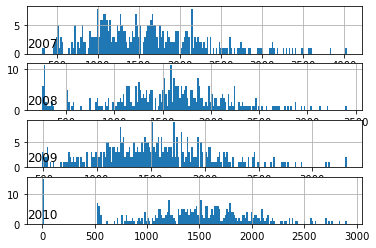

In [51]:
# plotting active power for each month a particular year 
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    
    active_power_data["Global_active_power"].hist(bins=200)
    plt.title(str(year), y=0, loc = 'left')
plt.show()
fig.tight_layout()
# el eje x representa kwatt

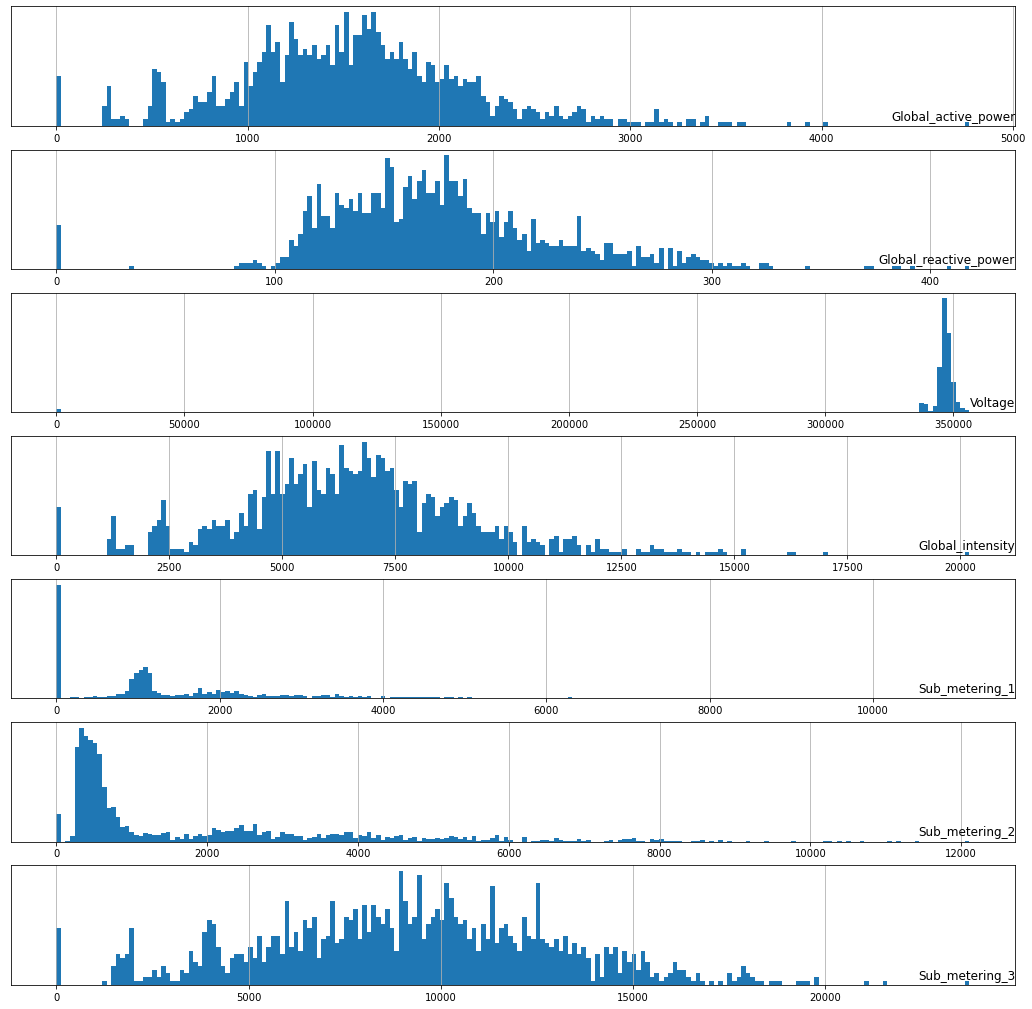

In [52]:
# histogram for full data


fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1 )
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()


In [ ]:
# plot the power distribution for each month for a particular year

### Plot power consumption hist for each month of 2007

In [95]:
data["2010-2"]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-02-01,1309.268,199.546,352332.84,5489.8,801.0,298.0,6425.0
2010-02-02,2157.432,131.168,350399.26,8853.6,0.0,382.0,21536.0
2010-02-03,766.906,136.396,348122.96,3204.8,0.0,424.0,3605.0
2010-02-04,1648.622,152.906,349593.87,6816.2,0.0,483.0,13074.0
2010-02-05,2187.910,233.980,346159.08,9248.4,1858.0,7966.0,14454.0
2010-02-06,980.898,129.238,346084.50,4198.8,0.0,656.0,8454.0
2010-02-07,1140.928,297.298,345067.37,5032.8,822.0,932.0,6337.0
2010-02-08,549.482,183.244,346892.19,2449.2,0.0,536.0,4191.0
2010-02-09,1392.492,170.312,346958.95,5887.8,929.0,500.0,11785.0


In [99]:
data["2010-1"]["Global_active_power"]

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
2010-01-06    1268.964
2010-01-07    1349.002
2010-01-08     555.664
2010-01-09    1593.318
2010-01-10    1504.820
2010-01-11    1383.180
2010-01-12       0.000
2010-01-13    1995.796
2010-01-14    2116.224
2010-01-15    2196.760
2010-01-16    2150.112
2010-01-17    1906.556
2010-01-18    1881.098
2010-01-19    2433.508
2010-01-20    2351.728
2010-01-21    2137.856
2010-01-22    1790.626
2010-01-23    2610.330
2010-01-24    2269.420
2010-01-25    1930.510
2010-01-26    2067.564
2010-01-27    2760.902
2010-01-28    2110.234
2010-01-29    2092.990
2010-01-30    2842.728
2010-01-31    1799.196
Freq: D, Name: Global_active_power, dtype: float64

<AxesSubplot:>

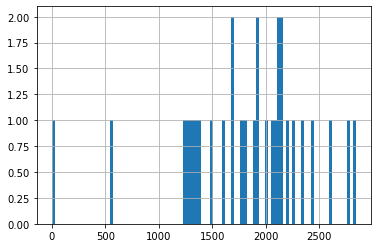

In [104]:
data["2010-1"]["Global_active_power"].hist(bins = 100)

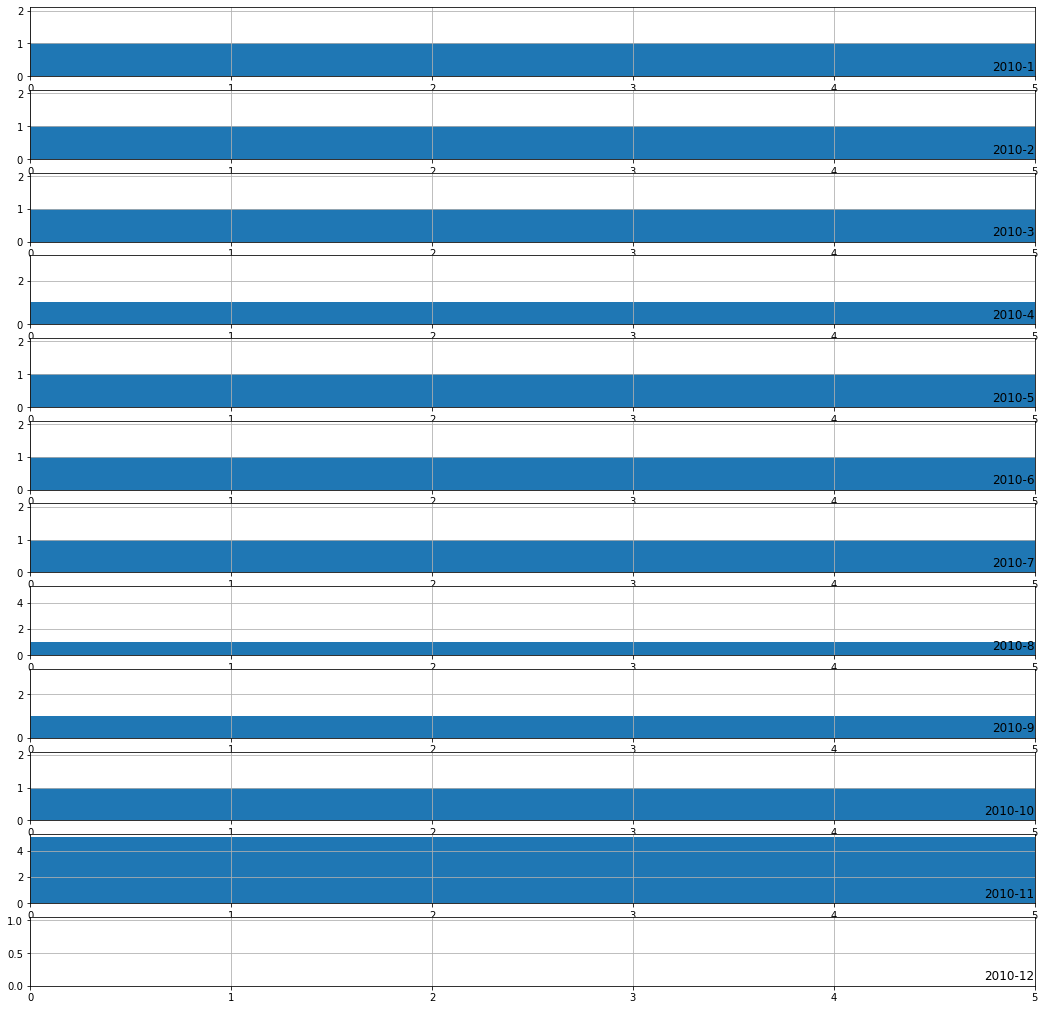

In [100]:
months = [i for i in range(1, 13)]


fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2010-' + str(months[i])
#     print(month)
    active_power_data = data[month]
#     print(active_power_data)
    active_power_data['Global_active_power'].hist(bins = 200)
    ax.set_xlim(0, 5)
    plt.title(month, y =0, loc = "right")
    
plt.show()
fig.tight_layout()

In [61]:
data["Global_active_power"]

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, Length: 1457, dtype: float64

## Active Power Uses Prediction 
**What can we predict?**
* Forecast hourly consumption for the next day.
* Forecast daily consumption for the next week.(haremos esta)
* Forecast daily consumption for the next month
* Forecast monthly consumption for the next year.
**Modeling Methods**

There are modeling methods and few of those are as follows

* Naive Methods--> Naive methods would include methods that make very simple. But offten very effective assumptions
* Classical Linear Methods-->Classical Linear methods include techniques are very effective for univariate time series forecasting

* Machine learning Methods --> Machine learning methods require that the problem be framed as as supervised problem.

    * K-nerarest neighbors
    * SVM
    * Decision trees
    * Random forest
    * Gradient boosting machines
  Deep learning methods --> combinations of CNN LSTM and ConvLSTM, have proven effective on time series classification tasks:
      * CNN
      * LSTM
      * CNN - LSTM
      
      
      
    
  
    

### Problem Framing
Given recent power consumption, what is the expected power consumption for the week ahead?

This requires that a predictive model forecast the total active power for each day over the next seven days

A model of this type could be helpful within the household in planning expanditures. it could also be helpful on the supply side for planning electricity demand for a specific household


input -- -Predict

[Week1]--->Week2

[Week2]---->Week3

[Week3]-----Week4

In [105]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [106]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1551.697967,176.172177,343032.233082,6578.159643,1593.084420,1839.005491,9185.029513
std,614.949776,51.844721,35759.251700,2549.274088,1581.929433,2082.860776,3774.129939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1162.226000,141.914000,345672.700000,5005.000000,582.000000,429.000000,6605.000000
50%,1534.652000,170.396000,346958.950000,6508.000000,1111.000000,683.000000,9230.000000
75%,1890.472000,202.392000,348264.250000,7953.400000,2196.000000,2711.000000,11716.000000
max,4773.386000,417.834000,356306.410000,20200.400000,11178.000000,12109.000000,23743.000000


In [107]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [108]:
data['2010']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-01-01,1224.252,165.336,349294.64,5093.4,2304.0,327.0,3558.0
2010-01-02,1693.778,124.784,350829.71,6995.2,1111.0,367.0,14623.0
2010-01-03,1298.728,130.076,348224.80,5411.2,1785.0,471.0,7115.0
2010-01-04,1687.440,144.464,348125.99,7025.8,1780.0,517.0,14393.0
2010-01-05,1320.158,192.524,346531.92,5659.0,1984.0,4885.0,6751.0
...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0


In [112]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [111]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [113]:
data_train.shape

(1112,)

In [114]:
data_test.shape

(345,)

### Prepare training data

In [116]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [117]:
data_train = np.array(data_train)

In [118]:
X_train, y_train = [], []


for i in range(7,len(data_train)-7):
    # train data
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [119]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[1209.176, 3390.46 , 2203.826, ..., 2225.748, 1723.288, 2341.338],
        [3390.46 , 2203.826, 1666.194, ..., 1723.288, 2341.338, 4773.386],
        [2203.826, 1666.194, 2225.748, ..., 2341.338, 4773.386, 2550.012],
        ...,
        [1940.116, 1394.874, 1717.182, ..., 2204.334, 1144.166, 2034.966],
        [1394.874, 1717.182, 1744.706, ..., 1144.166, 2034.966, 1888.022],
        [1717.182, 1744.706, 2204.334, ..., 2034.966, 1888.022, 1455.2  ]]),
 array([[4773.386, 2550.012, 2743.12 , ..., 1528.76 , 2072.638, 3174.392],
        [2550.012, 2743.12 , 3934.11 , ..., 2072.638, 3174.392, 2796.108],
        [2743.12 , 3934.11 , 1528.76 , ..., 3174.392, 2796.108, 3494.196],
        ...,
        [1888.022, 1455.2  , 2905.894, ..., 2183.618, 2195.452, 2094.098],
        [1455.2  , 2905.894, 2127.648, ..., 2195.452, 2094.098, 2047.968],
        [2905.894, 2127.648, 2183.618, ..., 2094.098, 2047.968, 2451.11 ]]))

In [121]:
X_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [122]:
pd.DataFrame(X_train)
# dia 1, dia2 .... dia 7, en este caso los dias son las caracteristicas

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338
1,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386
2,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012
3,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120
4,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120,3934.110
...,...,...,...,...,...,...,...
1093,2138.814,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334
1094,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166
1095,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966
1096,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966,1888.022


In [123]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108
2,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196
3,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004
4,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004,1824.760
...,...,...,...,...,...,...,...
1093,1144.166,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618
1094,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452
1095,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098
1096,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098,2047.968


In [124]:
# We must normalize

x_scaler = MinMaxScaler()

X_train = x_scaler.fit_transform(X_train)



In [126]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [127]:
pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6
0,1.000000,0.608483,0.659577,0.974702,0.338269,0.482174,0.773688
1,0.508439,0.659577,0.974702,0.338269,0.482174,0.773688,0.673597
2,0.551133,0.974702,0.338269,0.482174,0.773688,0.673597,0.858305
3,0.814446,0.338269,0.482174,0.773688,0.673597,0.858305,0.661134
4,0.282652,0.482174,0.773688,0.673597,0.858305,0.661134,0.416588


In [129]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446


In [130]:
X_train.shape

(1098, 7)

In [133]:
# LSTM expect 3 dimmension instead 

X_train = X_train.reshape(1098, 7, 1)

X_train.shape



(1098, 7, 1)

### Now we are ready to build LSTM model


In [134]:
reg = Sequential()

reg.add(LSTM(units = 200, activation= 'relu', input_shape=(7,1)))
# dentro de la campa dense colocamos el numero del horizonte en este caso 7
reg.add(Dense(7))

In [135]:
reg.compile(loss="mse", optimizer='adam')

In [136]:
reg.fit(X_train, y_train, epochs = 100)

Epoch 1/100
35/35 [==============================] - 9s 40ms/step - loss: 0.0910
Epoch 2/100
35/35 [==============================] - 1s 29ms/step - loss: 0.0240
Epoch 3/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0238
Epoch 4/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0243: 0s - loss: 0
Epoch 5/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0236
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0242
Epoch 7/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0233
Epoch 8/100
35/35 [==============================] - 0s 14ms/step - loss: 0.0238
Epoch 9/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0243
Epoch 10/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0236
Epoch 11/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0236
Epoch 12/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0239
Epoch 13/10

35/35 [==============================] - 1s 22ms/step - loss: 0.0224
Epoch 100/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0228


### Prepare test dataset and test LSTM model

In [138]:
data_test = np.array(data_test)
X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])
    
X_test, y_test

([array([1224.252, 1693.778, 1298.728, 1687.44 , 1320.158, 1268.964,
         1349.002]),
  array([1693.778, 1298.728, 1687.44 , 1320.158, 1268.964, 1349.002,
          555.664]),
  array([1298.728, 1687.44 , 1320.158, 1268.964, 1349.002,  555.664,
         1593.318]),
  array([1687.44 , 1320.158, 1268.964, 1349.002,  555.664, 1593.318,
         1504.82 ]),
  array([1320.158, 1268.964, 1349.002,  555.664, 1593.318, 1504.82 ,
         1383.18 ]),
  array([1268.964, 1349.002,  555.664, 1593.318, 1504.82 , 1383.18 ,
            0.   ]),
  array([1349.002,  555.664, 1593.318, 1504.82 , 1383.18 ,    0.   ,
         1995.796]),
  array([ 555.664, 1593.318, 1504.82 , 1383.18 ,    0.   , 1995.796,
         2116.224]),
  array([1593.318, 1504.82 , 1383.18 ,    0.   , 1995.796, 2116.224,
         2196.76 ]),
  array([1504.82 , 1383.18 ,    0.   , 1995.796, 2116.224, 2196.76 ,
         2150.112]),
  array([1383.18 ,    0.   , 1995.796, 2116.224, 2196.76 , 2150.112,
         1906.556]),
  array([ 

In [139]:
X_test, y_test = np.array(X_test), np.array(y_test)


In [141]:
# normalize, en test no usamos fit_transform, solo transform
 
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [142]:
X_test

array([[ 0.21532944,  0.31913595,  0.23179518, ...,  0.23653309,
         0.22521472,  0.24291015],
       [ 0.31913595,  0.23179518,  0.3177347 , ...,  0.22521472,
         0.24291015,  0.06751273],
       [ 0.23179518,  0.3177347 ,  0.23653309, ...,  0.24291015,
         0.06751273,  0.29692546],
       ...,
       [ 0.26107518,  0.27366392, -0.05533786, ..., -0.05533786,
        -0.05533786,  0.38590848],
       [ 0.27366392, -0.05533786, -0.05533786, ..., -0.05533786,
         0.38590848,  0.36318108],
       [-0.05533786, -0.05533786, -0.05533786, ...,  0.38590848,
         0.36318108,  0.30844547]])

In [143]:
X_test.shape

(331, 7)

In [144]:
# reshape 
X_test = X_test.reshape(331, 7, 1)
X_test.shape

(331, 7, 1)

## Make Predicction 

In [145]:
y_pred = reg.predict(X_test)

In [146]:
y_pred

array([[ 0.2673949 ,  0.3268773 ,  0.31665558, ...,  0.34937394,
         0.3286832 ,  0.33292717],
       [ 0.19061695,  0.2718921 ,  0.2822516 , ...,  0.32864493,
         0.3179962 ,  0.3145812 ],
       [ 0.28778493,  0.3390289 ,  0.32643217, ...,  0.33725148,
         0.31318218,  0.32230544],
       ...,
       [ 0.05657456,  0.04691049,  0.03663392, ...,  0.05255937,
        -0.01002038,  0.05869375],
       [ 0.29279047,  0.30467188,  0.24118116, ...,  0.22454053,
         0.14807579,  0.20058343],
       [ 0.30369586,  0.31383413,  0.26722777, ...,  0.24521862,
         0.21270557,  0.2525249 ]], dtype=float32)

In [147]:
# regresamos la prediccion a valores reales
y_pred = y_scaler.inverse_transform(y_pred)

In [148]:
y_true = y_scaler.inverse_transform(y_test)
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

### Evaluate the model (RMSE)

In [150]:
y_true.shape

(331, 7)

In [154]:
def evaluate_model(y_true, y_pred):
    scores = []
    # las columnas son los dias
    # Calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_pred[:,i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
        
    # Calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_pred.shape[1]):
            total_score = total_score + (y_true[row, col] - y_pred[row, col])**2
            # el denominador es para conseguir el numero total de prediccion row por columnas
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_pred.shape[1]))
        
    return total_score, scores

In [155]:
evaluate_model(y_true, y_pred)

(585.8478728969152,
 [593.4125849261145,
  603.0006405072343,
  582.502615693031,
  574.008045736311,
  591.4913668519398,
  582.1303226071994,
  573.7974899088287])

#### Para saber si nuestro modelo lo hizo bien generalmente comparamos con la desviacion estandar

si el error de nuestra prediccion es menor  la desviacion estandar, nuestro modelo lo hace bien, en este caso lo hace muy bien




In [156]:
np.std(y_true[0])

710.0253857243853